In [69]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#  Load Data
df = pd.read_csv(r"C:\Users\HP\Desktop\python\Walmart_Analysis\Walmart.csv")
df.head(20)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
5,6,WALM026,Denton,Electronic accessories,$85.39,7.0,25/03/19,18:30:00,Ewallet,4.1,0.48
6,7,WALM088,Cleburne,Electronic accessories,$68.84,6.0,25/02/19,14:36:00,Ewallet,5.8,0.33
7,8,WALM100,Canyon,Home and lifestyle,$73.56,10.0,24/02/19,11:38:00,Ewallet,8.0,0.18
8,9,WALM066,Grapevine,Health and beauty,$36.26,2.0,10/01/19,17:15:00,Credit card,7.2,0.33
9,10,WALM065,Texas City,Food and beverages,$54.84,3.0,20/02/19,13:27:00,Credit card,5.9,0.33


### Exploratory Data Analysis (EDA) 
#### Remove the dollar sign from Unit_price column and convert the text to float datatype of column
#### Add column Amount to know value of product 
#### Unit_price and Quantity column having missing value handle them first

In [71]:
# Checking the how many rows, column in dataset
df.shape

(10051, 11)

In [72]:
# Checking the all information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [73]:
# Checking the any duplicate value present
df.duplicated().sum()

51

In [74]:
# Droping the duplicate values from the dataset
df.drop_duplicates(inplace=True)

In [75]:
# Checking the any null value present in data or not

df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [76]:
# Removeing the null values from the dataset 
df.dropna(inplace=True)

In [77]:
# Remove Dollar($) sign from column unit_price and place space

df['unit_price'] = df['unit_price'].str.replace('$', '', regex=False).astype(float)

In [78]:
# Converting the datatype of "date" column
 
df['date'] = pd.to_datetime(df['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_1428\2273664682.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [79]:
# Creating New Column As 'Total' 

df['total'] = df['unit_price'] * df['quantity']
df

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,2023-03-08,10:10:00,Cash,3.0,0.33,111.00
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,2021-02-22,14:20:00,Cash,7.0,0.48,116.00
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,2023-06-15,16:00:00,Credit card,4.0,0.48,156.00
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,2021-02-25,12:25:00,Cash,7.0,0.48,158.00


#### Completed with Exploratory Data Analysis 

## Creating Some Chart for better Understanding of DATA

In [80]:
# Columns of dataset
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

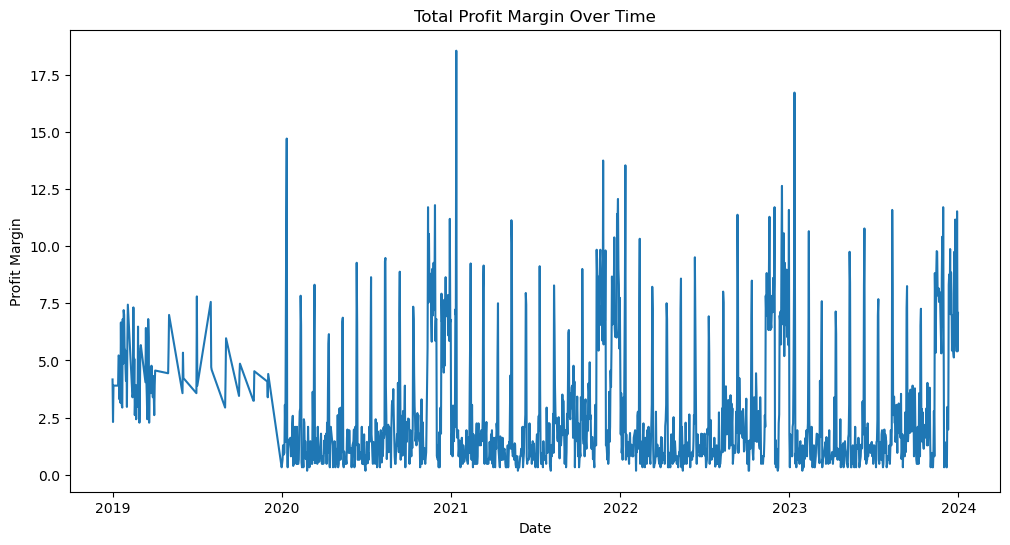

In [81]:
sales = df.groupby('date')['profit_margin'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='profit_margin', data=sales)
plt.title('Total Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.show()

### CONCLUSION 
#### The sales trend remained consistent throughout the observed period, with noticeable peaks and occasional dips. This indicates regular customer activity, though certain dates show higher performance — possibly due to promotional events or holidays.

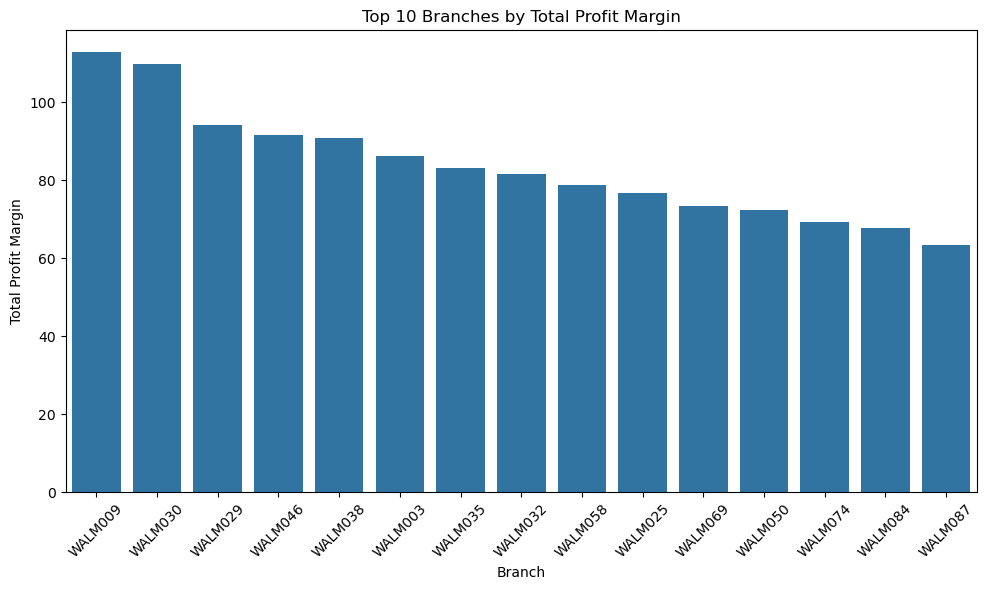

In [82]:
# Group
branch = df.groupby('Branch')['profit_margin'].sum().reset_index()

# Sort
top_branches = branch.sort_values(by='profit_margin', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='profit_margin', data=top_branches)
plt.title('Top 10 Branches by Total Profit Margin')
plt.xlabel('Branch')
plt.ylabel('Total Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Conclusion
#### Among all branches, Branch **WALM009** AND **WALM030** recorded the highest overall profit margin, indicating stronger sales performance compared to others.  The other branches also performed decently, but not at the same level.
#### The variance in profitability suggests differences in sales strategy across locations.

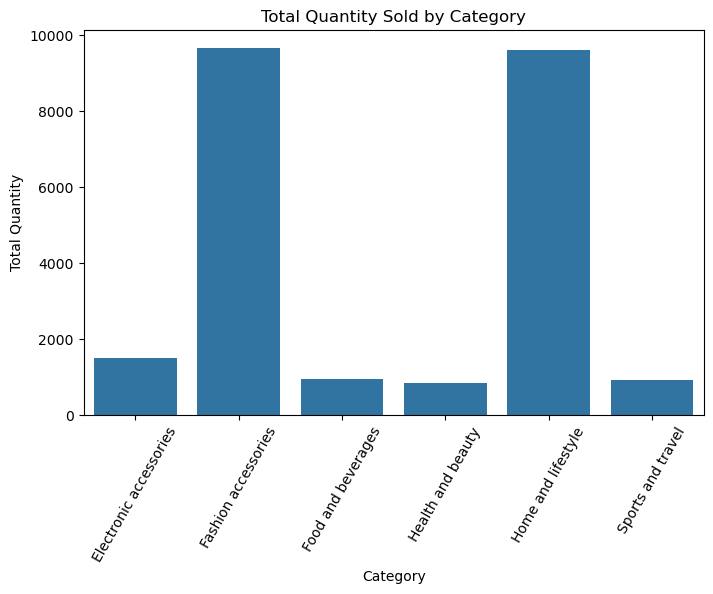

In [83]:
cat = df.groupby('category')['quantity'].sum().reset_index()
 
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='quantity', data=cat)
plt.xticks(rotation=60)
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.show()

### CONCLUSION
#### The highest-selling category by volume is **Fashion accessories** (9,653 units), while **Health and beauty** sells the least (854 units). However, just because a product sells more doesn't always mean it brings in the most profit — so it's important to also look at how much profit each item is contributing, not just the volume.

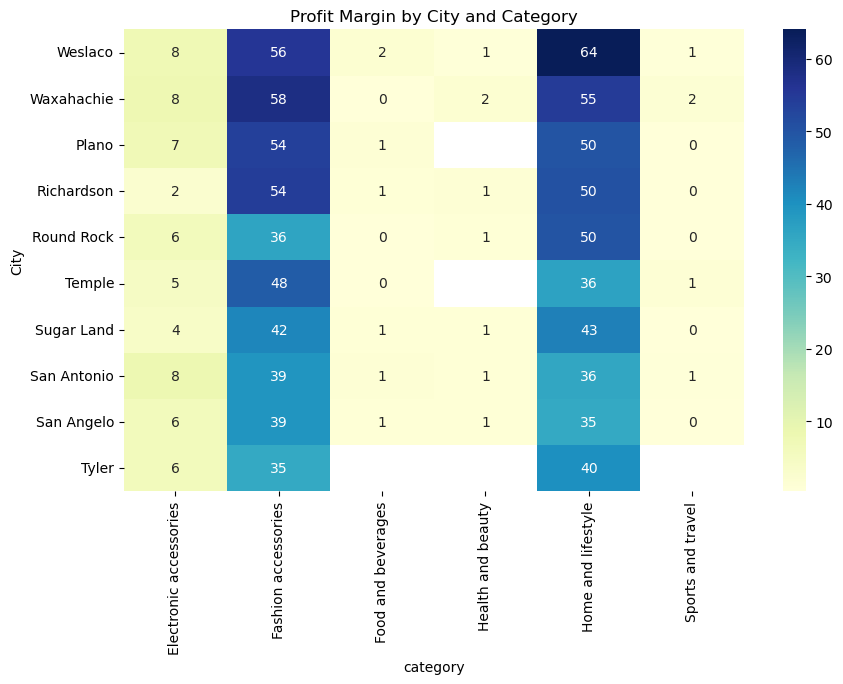

In [84]:
data = df.pivot_table(values='profit_margin', index='City', columns='category', aggfunc='sum')
data = data.loc[data.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Profit Margin by City and Category')
plt.show()

### CONCLUSION 
#### TThe heatmap shows that certain categories perform better in specific cities like **Home and lifestyle** and **Fashion accessories** are more profitable in Weslaco and Waxahachie, while **Electronic accessories** lead in San Antonio. In contrast, **Health and beauty** and **Food and beverages** generate lower profit margins across most cities, highlighting areas for improvement or targeted promotions.

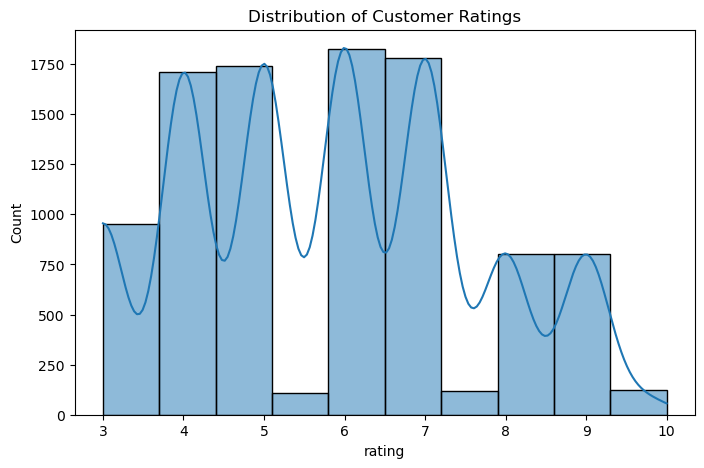

In [85]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'],kde=True, bins=10)
plt.title('Distribution of Customer Ratings')
plt.show()

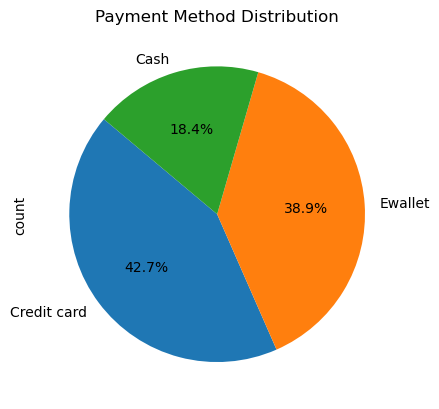

In [86]:
df['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.show()

### Conclusion
#### Customers mostly prefer Credit cards (42.7%), followed by Ewallets (39.9%), while Cash (18.4%) is less common. This highlights the strong adoption of digital payments, though cash still plays a role for some customers.

C:\Users\HP\AppData\Local\Temp\ipykernel_1428\792885811.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


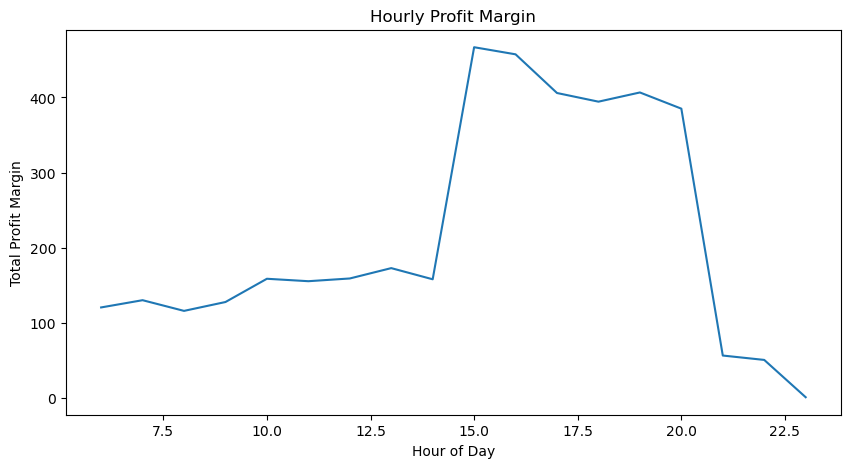

In [87]:
df['hour'] = pd.to_datetime(df['time']).dt.hour
hourly_sales = df.groupby('hour')['profit_margin'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='profit_margin', data=hourly_sales)
plt.title('Hourly Profit Margin')
plt.xlabel('Hour of Day')
plt.ylabel('Total Profit Margin')
plt.show()

### CONCLUSION
#### Sales peak during specific hours (especially afternoons/evenings), indicating higher customer activity. Optimizing staffing and promotions during these periods can help boost profits.